In [2]:
#Python imports
import pandas as pd
import numpy as np

#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns


# Wrangle
# import create functions
from wrangle import open_json_data
import prepare as p
import wrangle as w
from wrangle import wrangle_github_repos

#NLP
import requests
import nltk
import unicodedata
import re

#Modeling
from prepare import split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer




#Wordclouds
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import json

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christophermayorga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christophermayorga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# read in json data as DataFrame
df = open_json_data()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 1 to 681
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             612 non-null    object
 1   language         612 non-null    object
 2   readme_contents  612 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


In [6]:
from scipy import stats

In [7]:
# use function from wrangle to filter non-EN
df = w.get_english_only(df)
# remove code in readme_contents
df = w.remove_code_snippets(df)

/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_readme'] = df.readme_contents\
/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_readme'] = df.cleaned_readme\
/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [8]:
# create column for cleaned, tokenized string with stopwords removed
df = w.extensive_clean(df)

/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_readme'] = df.cleaned_readme.apply(


In [9]:
# create columns for count of characters in original and cleaned contents
df = w.create_char_counts(df)
# create column for the percentage difference in above columns
df = w.create_pct_changed(df)

/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original_char_length'] = df.readme_contents.apply(lambda row: len(row))
/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_char_length'] = df.cleaned_readme.apply(lambda row: len(row))
/Users/christophermayorga/Desktop/codeup-data-science/NLP-Project/wrangle.py:153: SettingWithCopyWarning: 

In [10]:
# view languages present
df.language.value_counts(dropna=False)

Python              142
JavaScript          115
Jupyter Notebook     69
HTML                 37
TypeScript           29
R                    25
Dart                 19
Java                 16
Kotlin               12
Vue                   9
PHP                   8
C++                   8
CSS                   7
C#                    6
Go                    6
Swift                 6
Shell                 6
Ruby                  4
SCSS                  2
Clojure               2
Dockerfile            2
TeX                   2
F#                    1
Stan                  1
Pascal                1
GAML                  1
Mathematica           1
Nextflow              1
C                     1
Objective-C           1
Roff                  1
Elixir                1
G-code                1
MATLAB                1
Common Lisp           1
Nix                   1
Reason                1
Julia                 1
Name: language, dtype: int64

In [ ]:
# T test unique words for each of the languages 

In [11]:
# wrangle data into prepare DataFrames
X_train, y_train, \
X_validate, y_validate, \
X_test, y_test = wrangle_github_repos()

In [13]:
X_train.head(2)

repository  \
143  InstituteforDiseaseModeling/synthpops   
70                 covid19-model/simulator   

                                       original_readme  \
143  # SynthPops\n\nSynthPops is a module designed ...   
70   \n\n\n\n# Quantifying the Effects of Contact T...   

                                        cleaned_readme  \
143  synthpops synthpops module designed generate s...   
70   quantifying effects contact tracing testing co...   

                                     lemmatized_readme  original_char_length  \
143  synthpops synthpops module designed generate s...                  5324   
70   quantifying effect contact tracing testing con...                  7529   

     cleaned_char_length  pct_char_removed natural_language  
143                 3498                65               en  
70                  4490                59               en

In [15]:
# create series of top 20 words across all languages
all_words = ' '.join(X_train.lemmatized_readme) .replace('\'', '')
all_lang_words = pd.Series(all_words.split())

In [16]:
# create series of words for each proggramming language
py_words = pd.Series(' '.join(X_train[y_train.programming_language == 'Python']\
                           .lemmatized_readme).replace('\'', '').split())
js_words = pd.Series(' '.join(X_train[y_train.programming_language == 'JavaScript']\
                           .lemmatized_readme).replace('\'', '').split())
jup_words = pd.Series(' '.join(X_train[y_train.programming_language == 'Jupyter Notebook']\
                           .lemmatized_readme).replace('\'', '').split())
html_words = pd.Series(' '.join(X_train[y_train.programming_language == 'HTML']\
                           .lemmatized_readme).replace('\'', '').split())
r_words = pd.Series(' '.join(X_train[y_train.programming_language == 'R']\
                           .lemmatized_readme).replace('\'', '').split())
ts_words = pd.Series(' '.join(X_train[y_train.programming_language == 'TypeScript']\
                           .lemmatized_readme).replace('\'', '').split())

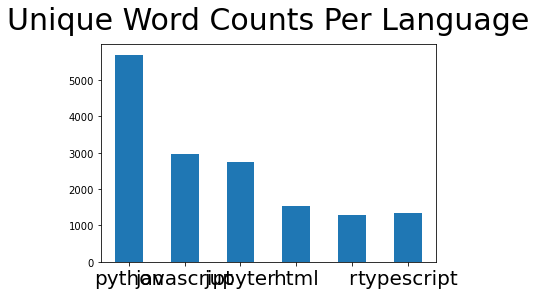

In [17]:
unique_word_counts = [{'python':len(set(' '.join(py_words).split()))},
                      {'javascript':len(set(' '.join(js_words).split()))},
                      {'jupyter':len(set(' '.join(jup_words).split()))},
                      {'html':len(set(' '.join(html_words).split()))},
                      {'r':len(set(' '.join(r_words).split()))},
                      {'typescript':len(set(' '.join(ts_words).split()))}]
pd.DataFrame([d.values() for d in unique_word_counts],
             index=[list(d.items())[0][0] for d in unique_word_counts],
             columns=['unique_word_count']).plot.bar(legend=None)
plt.xticks(rotation=0, fontsize=20)
plt.title('Unique Word Counts Per Language', fontsize=30, pad=15)
plt.show()

In [25]:
len(py_words.unique())

5697

In [26]:
len(js_words.unique())

2963

In [30]:
js_words.unique()

array(['ce', 'trebuie', 'sa', ..., 'grunt', 'impress', 'wasting'],
      dtype=object)

In [31]:
t, p = stats.ttest_ind(len(py_words.unique()), len(js_words.unique()))
t, p

(nan, nan)

In [ ]:
null_hypothesis = "There is no difference between the unique word counts of Python and Javascript"
alternative_hypothesis = "There is a difference between the unique word counts of Python and Javascript"
confidence_level = .95
alpha = 1 - confidence_level

In [33]:
python_lang = X_train[y_train.programming_language == 'Python']
javascript_lang = X_train[y_train.programming_language == 'JavaScript']
html_lang = X_train[y_train.programming_language == 'HTML']
jupyter_lang = X_train[y_train.programming_language == 'Jupyter Notebook']
r_lang = X_train[y_train.programming_language == 'R']
ts_lang = X_train[y_train.programming_language == 'TypeScript']

In [2]:
repos = open('data2.json')
repos = json.load(repos)

In [6]:
# remove Markdown (anything between square brackets)
df.readme_contents = df.readme_contents.apply(lambda row: re.sub(r'\[.+\]', '', row))

In [7]:
df.language.value_counts()

Python              72
JavaScript          48
Jupyter Notebook    36
HTML                24
TypeScript          10
R                   10
Vue                  7
Java                 6
Dart                 5
C++                  5
Ruby                 5
C#                   4
Kotlin               4
PHP                  4
CSS                  4
Go                   3
TeX                  2
SCSS                 2
Swift                2
Common Lisp          1
G-code               1
Elixir               1
Stan                 1
Shell                1
Julia                1
Objective-C          1
F#                   1
Nextflow             1
MATLAB               1
Name: language, dtype: int64

In [8]:
#Check number of rows/ columns
df.shape

(299, 3)

In [9]:
#Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             299 non-null    object
 1   language         263 non-null    object
 2   readme_contents  299 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


In [10]:
#Dataframe stats
df.describe()

repo language  \
count                     299      263   
unique                    296       29   
top     RehanSaeed/Schema.NET   Python   
freq                        2       72   

                                          readme_contents  
count                                                 299  
unique                                                296  
top     !(https://dg1fd6ea8poyj.cloudfront.net/images/...  
freq                                                    2

In [11]:
#Drop any df duplicates
df = df.drop_duplicates().dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 297
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             260 non-null    object
 1   language         260 non-null    object
 2   readme_contents  260 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [13]:
#Rename readme_contents column
df = df.rename({'readme_contents':'original'},axis=1)

#Apply functions from prepare script
df['clean'] = df.original.apply(basic_clean)
df['lemmatized'] = df.clean.apply(lemmatize)
df['stopwords_removed'] = df.lemmatized.apply(remove_stopwords)
df.head()

repo          language  \
1   covid19india/covid19india-react        JavaScript   
3    tokyo-metropolitan-gov/covid19               Vue   
4                owid/covid-19-data            Python   
6  ieee8023/covid-chestxray-dataset  Jupyter Notebook   
7                     geohot/corona            Python   

                                            original  \
1  \n\n\n\n\n  Here's our data .\n\n\n## Setup\n\...   
3  # 東京都 新型コロナウイルス感染症対策サイト\n\n(https://github.com...   
4  # COVID-19 Dataset by _Our World in Data_ \n(h...   
6  \n#### 🛑 Note: please do not claim diagnostic ...   
7  # Reverse engineering the coronavirus (SARS-Co...   

                                               clean  \
1  \n\n\n\n\n  here's our data \n\n\n setup\n\n\n...   
3    \n\nhttpsgithubcomtokyometropolitangovcovid1...   
4   covid19 dataset by our world in data \nhttpso...   
6  \n  note please do not claim diagnostic perfor...   
7   reverse engineering the coronavirus sarscov2\...   

                                          lemmatized  \
1  here's our data setup yarn install yarn start ...   
3  httpsgithubcomtokyometropolitangovcovid19actio...   
4  covid19 dataset by our world in data httpsourw...   
6  note please do not claim diagnostic performanc...   
7  reverse engineering the coronavirus sarscov2 s...   

                                   stopwords_removed  
1  here's data setup yarn install yarn start cont...  
3  httpsgithubcomtokyometropolitangovcovid19actio...  
4  covid19 dataset world data httpsourworldindata...  
6  note please claim diagnostic performance model...  
7  reverse engineering coronavirus sarscov2 start...

In [14]:
# join all text with stopwords removed 
all_words = ' '.join(df.stopwords_removed)
all_words

"here's data setup yarn install yarn start contribution new contributing open source github contributingmd detail issue work repository small subset work put together much larger pool voluntary effort contributed generous people around world reach u hellocovid19indiaorg httpsgithubcomtokyometropolitangovcovid19actionsqueryworkflow3a22productiondeploy22 httpsgithubcomtokyometropolitangovcovid19actionsqueryworkflow3a22ogpbuilder22 httpsgithubcomtokyometropolitangovcovid19actionsqueryworkflow3a22autoi18ngenerator22 httpsstopcovid19metrotokyolgjp docsfrreadmemd issue contributingmd codeofconductmd licensetxt forkedsitesmd translationmd fordevelopersmd covid19 dataset world data httpsourworldindataorgcoronavirus publicdata httpsgithubcomellerbrockopensourcebadges find data covid19 documentation publicdata documentation publicdatareadmemd publicdatavaccinationsreadmemd publicdataexcessmortalityreadmemd scriptsreadmemd scriptsscriptsvaccinationsreadmemd scriptsscriptsvaccinationscontributemd 

In [15]:
# we can transform it into a pandas Series
all_words = pd.Series(all_words.split())
all_words.value_counts().head(20)

data           1828
covid19        1085
case            725
de              554
file            551
run             513
use             489
country         467
1               465
model           457
number          446
using           419
code            410
source          409
project         395
time            356
2               328
death           325
coronavirus     323
api             322
dtype: int64

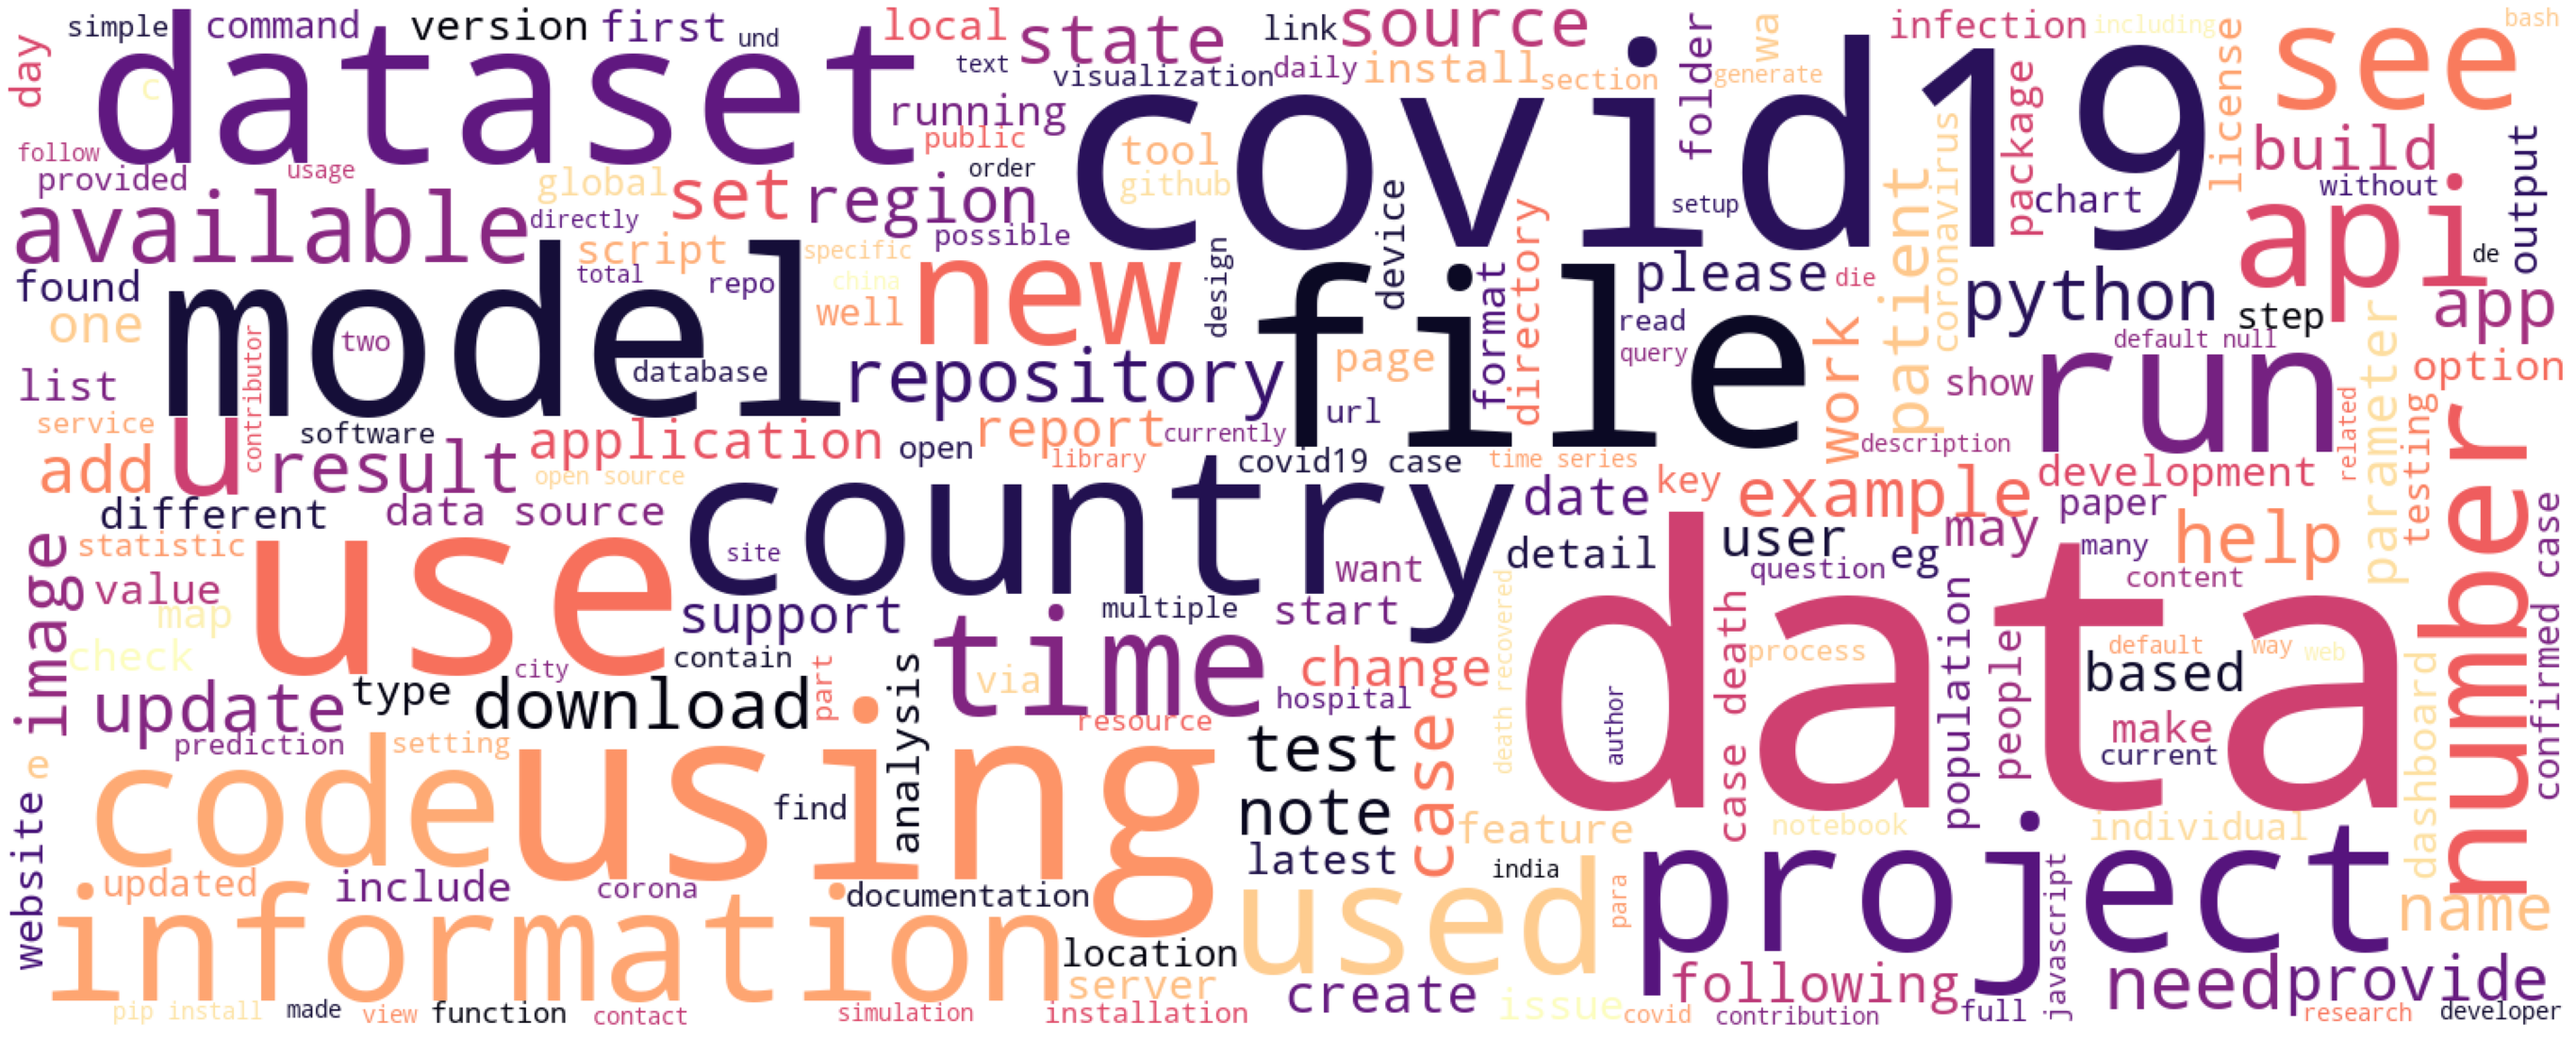

In [16]:
# Wordcloud based on all words accross repositories using all_words series
all_cloud = WordCloud(background_color='white', colormap='magma', height=600, width=1500,random_state=123).generate(' '.join(all_words))
plt.figure(figsize=(100,20))
plt.axis('off')
plt.imshow(all_cloud)

In [17]:
# Produce the most frequently occuring bigrams
top_20_starred_repo_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_starred_repo_bigrams

(data, source)            108
(confirmed, case)          93
(covid19, case)            80
(case, death)              67
(default, null)            66
(pip, install)             65
(time, series)             65
(open, source)             65
(covid19, data)            56
(social, distancing)       54
(coronavirus, covid19)     54
(novel, coronavirus)       53
(varchar255, default)      53
(make, sure)               53
(los, datos)               49
(john, hopkins)            47
(de, la)                   46
(feel, free)               44
(public, health)           44
(covid19, pandemic)        44
dtype: int64

In [18]:
starred_repo_bigrams = top_20_starred_repo_bigrams[3:]

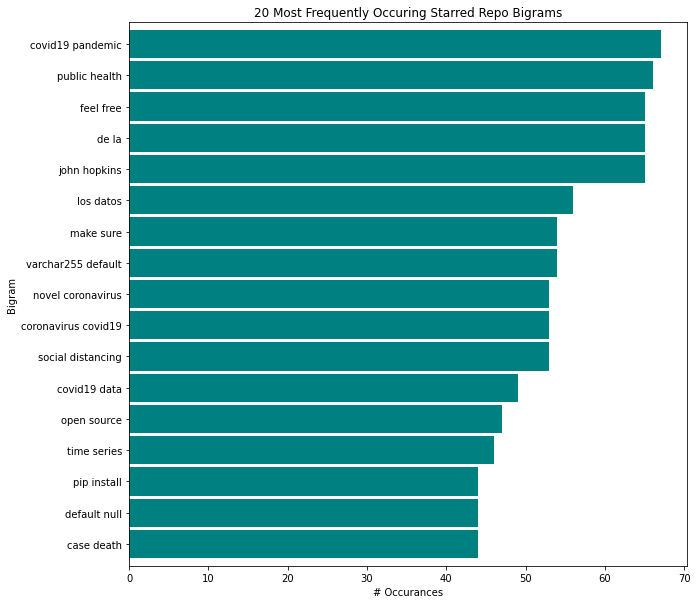

In [19]:
#Visualize 20 most frequently occuring bigrams
starred_repo_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 10))

plt.title('20 Most Frequently Occuring Starred Repo Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = starred_repo_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

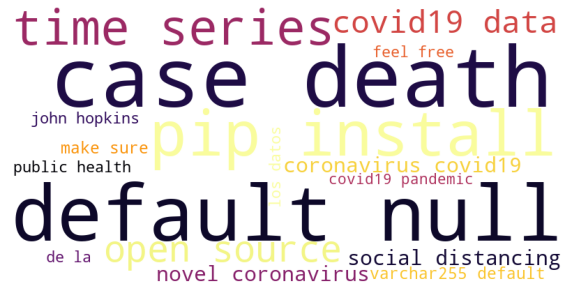

In [20]:
data = {k[0] + ' ' + k[1]: v for k, v in starred_repo_bigrams.to_dict().items()}
img = WordCloud(background_color='white',colormap='inferno', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
top_30_starred_repo_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                     )

top_30_starred_repo_trigrams

(varchar255, default, null)                         53
(confirmed, case, death)                            30
(los, datos, abiertos)                              25
(john, hopkins, university)                         25
(time, series, data)                                24
                                                    ..
(easily, forked, different)                          1
(r, v, martin)                                       1
(friendly, mailtohmengineeroutlookcom, portugal)     1
(function, declaration, function)                    1
(du, erhaltst, eine)                                 1
Length: 107051, dtype: int64

In [22]:
starred_repo_trigrams = top_30_starred_repo_trigrams[20:51]

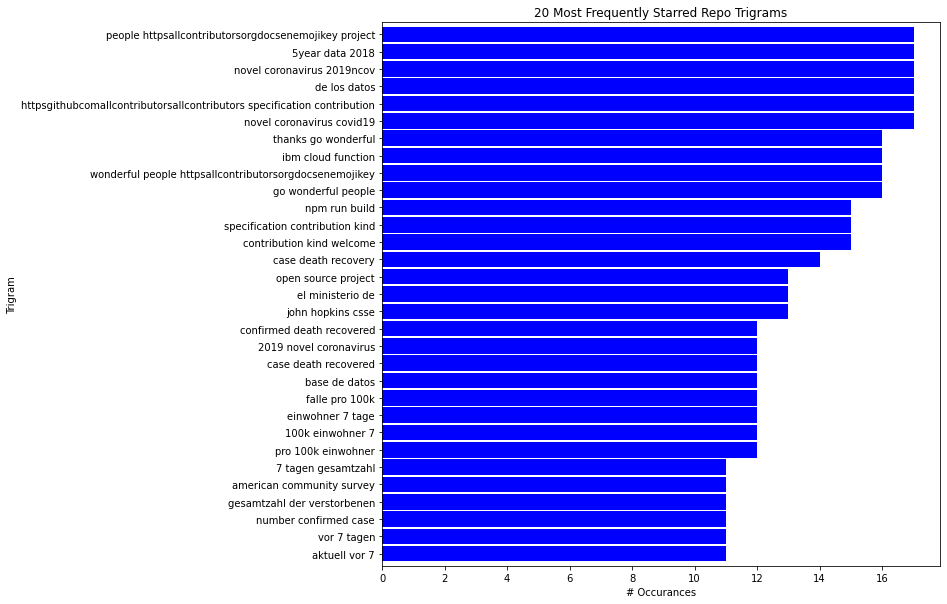

In [23]:
#Plot 20 most frequently starred repo trigrams
starred_repo_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))

plt.title('20 Most Frequently Starred Repo Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = starred_repo_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

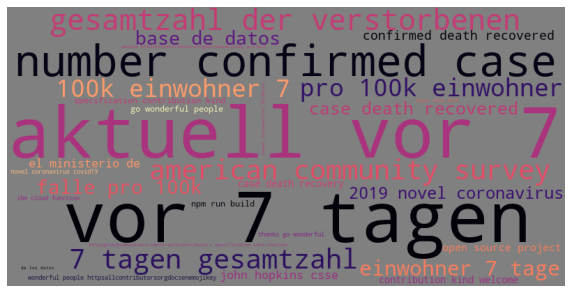

In [24]:
#Trigram wordcloud
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in starred_repo_trigrams.to_dict().items()}
img = WordCloud(background_color='grey', colormap='magma', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
top_20_starred_repo_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                     )
top_20_starred_repo_trigrams

(varchar255, default, null)                         53
(confirmed, case, death)                            30
(los, datos, abiertos)                              25
(john, hopkins, university)                         25
(time, series, data)                                24
                                                    ..
(easily, forked, different)                          1
(r, v, martin)                                       1
(friendly, mailtohmengineeroutlookcom, portugal)     1
(function, declaration, function)                    1
(du, erhaltst, eine)                                 1
Length: 107051, dtype: int64

In [26]:
#How many counts per language
df.language.value_counts().head()

Python              72
JavaScript          47
Jupyter Notebook    36
HTML                23
TypeScript          10
Name: language, dtype: int64

In [27]:
# Rename language columns
python = df[df.language == 'Python']
javascript = df[df.language == 'JavaScript']
HTML = df[df.language == 'HTML']
jupyter_notebook = df[df.language == 'Jupyter Notebook']
R = df[df.language == 'R']

In [28]:
#Joining all txt + Remove stopwaords from each language column
python_words = ' '.join(python.stopwords_removed)
javascript_words = ' '.join(javascript.stopwords_removed)
html_words = ' '.join(HTML.stopwords_removed)
jupyter_notebook_words = ' '.join(jupyter_notebook.stopwords_removed)
r_words = ' '.join(R.stopwords_removed)

In [29]:
#value counts of words in python
python_freq = pd.Series(python_words.split()).value_counts()
python_freq.head()

data       432
model      209
file       172
run        170
covid19    167
dtype: int64

In [30]:
#value counts of words in javascript
javascript_freq = pd.Series(javascript_words.split()).value_counts()
javascript_freq.head()

covid19        435
data           354
coronavirus    220
case           197
country        152
dtype: int64

In [31]:
#value counts of words in jupyter notebook
jupyter_notebook_freq = pd.Series(jupyter_notebook_words.split()).value_counts()
jupyter_notebook_freq.head()

data       340
de         207
covid19    206
case       158
model      141
dtype: int64

In [32]:
#value counts of words in HTML
html_freq = pd.Series(html_words.split()).value_counts()
html_freq.head()

data       172
covid19    105
case        91
number      80
project     75
dtype: int64

In [33]:
#value counts of words in R
R_freq = pd.Series(r_words.split()).value_counts()
R_freq.head()

data       138
de          47
covid19     43
case        39
source      37
dtype: int64

In [34]:
# combining all words across all languages
all_words = python_words + javascript_words + html_words + jupyter_notebook_words + r_words

In [35]:
#Checking value counts of all words
all_freq = pd.Series(all_words.split()).value_counts()
all_freq.head()

data       1436
covid19     956
case        585
model       400
number      356
dtype: int64

In [36]:
#DataFrame counting all words across all language subsets
word_counts = (pd.concat([all_freq,python_freq,javascript_freq,html_freq,jupyter_notebook_freq,R_freq], axis=1, sort=True)
                .set_axis(['All','Python','Javascript','HTML','Jupyter Notebook','R'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

All  Python  Javascript  HTML  Jupyter Notebook  R
'       9       0           8     1                 0  0
''     17       5           9     0                 3  0
'0'    23       0          23     0                 0  0
'02'    3       0           3     0                 0  0
'04'    1       0           1     0                 0  0

In [37]:
#Count all words sorted by all languages
word_counts.sort_values(by='All', ascending=False).head(10)

All  Python  Javascript  HTML  Jupyter Notebook    R
data     1436     432         354   172               340  138
covid19   956     167         435   105               206   43
case      585     100         197    91               158   39
model     400     209          24    24               141    2
number    356      86          72    80                96   22
de        354      32          61     7               207   47
country   350     111         152    25                49   13
run       339     170          58    59                49    3
file      332     172          59    42                43   16
source    328      92          97    44                58   37

Text(0.5, 1.0, 'Proportion of Programming Languages for the 20 Most Common Words')

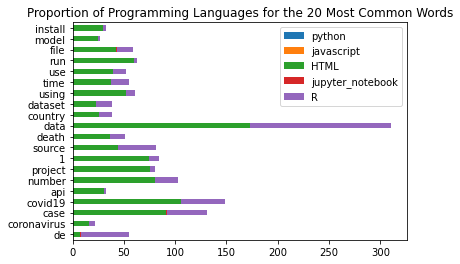

In [38]:
#Plot Proportion of Programming Languages for the 20 Most Common Words
(word_counts
 .assign(python=word_counts['Python'] / word_counts['All'],
         javascript=word_counts.Javascript / word_counts['All'],
         html=word_counts.HTML / word_counts['All'],
         jupyter_notebook=word_counts['Jupyter Notebook'] / word_counts['All'],
         r=word_counts.R / word_counts['All'])
 .sort_values(by='All')
 [['python', 'javascript','HTML','jupyter_notebook','R']]
 .tail(20)
 .sort_values('python')
 .plot.barh(stacked=True))

plt.title('Proportion of Programming Languages for the 20 Most Common Words')

Text(0.5, 1.0, 'Python Repo Language Wordcloud')

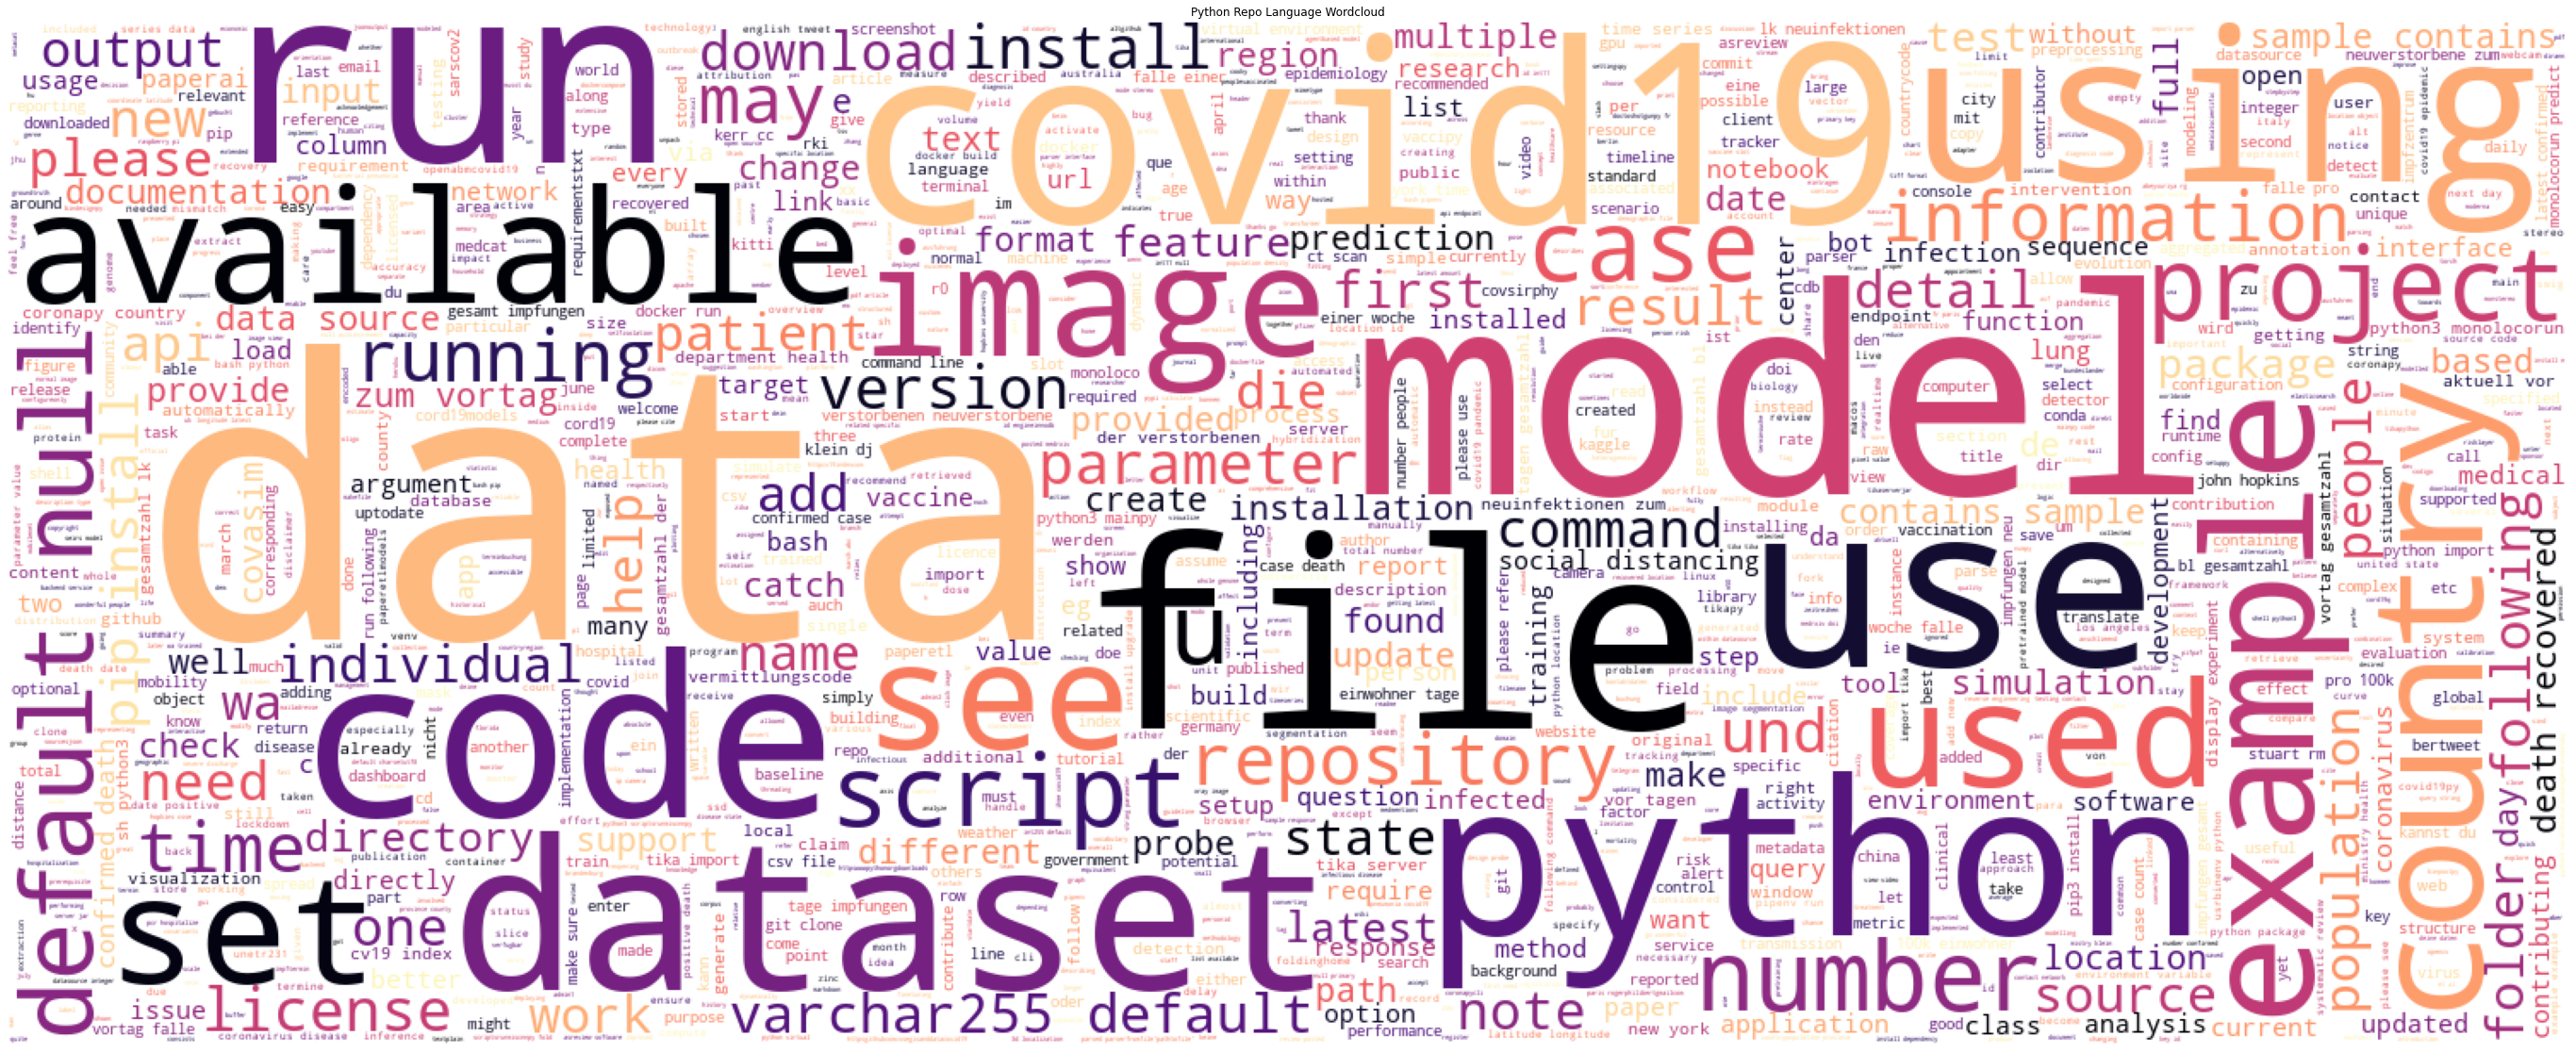

In [39]:
python_cloud = WordCloud(max_words=None,background_color='white', colormap='magma', height=600, width=1500,random_state=123).generate(python_words)
plt.figure(figsize=(100,20))
plt.axis('off')
plt.imshow(python_cloud)
plt.title('Python Repo Language Wordcloud')